In [123]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import LSTM,Dense
from IPython.display import clear_output
from sklearn.preprocessing import MinMaxScaler


In [124]:
stock= pd.read_csv('stock.csv', parse_dates=True, index_col=0)

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
                Open      High       Low     Close        Volume
Date                                                            
2018-08-23  10817.33  10863.13  10802.79  10863.13           NaN
2018-08-22  10790.24  10828.21  10774.69  10804.20  2.039766e+09
2018-08-21  10697.01  10792.20  10697.01  10792.20  1.995001e+09
2018-08-20  10698.76  10729.90  10663.44  10699.05  2.087036e+09
2018-08-17  10702.60  10757.01  10688.55  10690.96  2.096415e+09


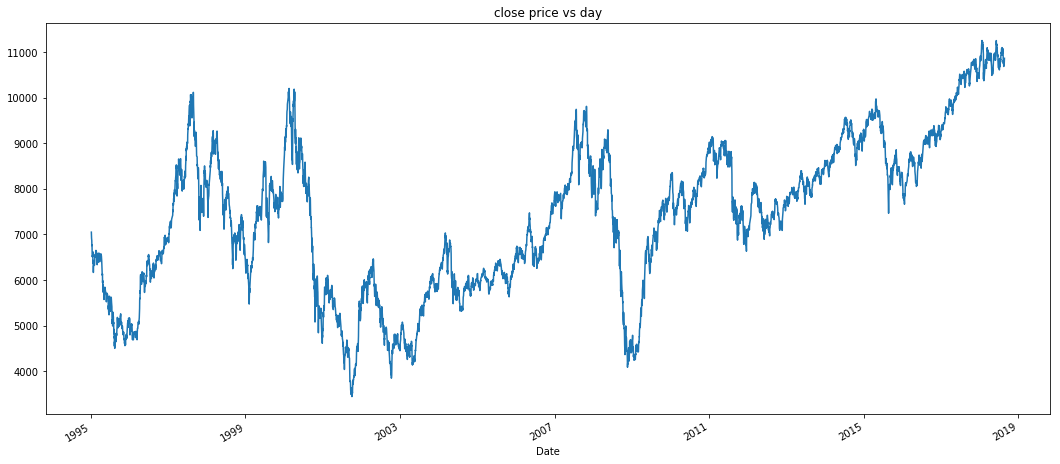

In [125]:
print(stock.columns)
print(stock.head())
stock.loc[:]['Close'].plot(figsize=(18, 8), title='close price vs day')

                Open      High       Low     Close        Volume
Date                                                            
2018-08-23  10817.33  10863.13  10802.79  10863.13           NaN
2018-08-22  10790.24  10828.21  10774.69  10804.20  2.039766e+09
2018-08-21  10697.01  10792.20  10697.01  10792.20  1.995001e+09
2018-08-20  10698.76  10729.90  10663.44  10699.05  2.087036e+09
2018-08-17  10702.60  10757.01  10688.55  10690.96  2.096415e+09
               Open     High      Low    Close  Volume
Date                                                  
1995-01-05  7129.94  7144.70  7040.72  7051.49     NaN
1995-01-06  7086.88  7086.88  6884.61  6919.31     NaN
1995-01-07  6948.27  6948.27  6855.55  6915.40     NaN
1995-01-09  6948.73  6959.74  6869.08  6869.08     NaN
1995-01-10  6817.85  6838.95  6706.67  6756.88     NaN


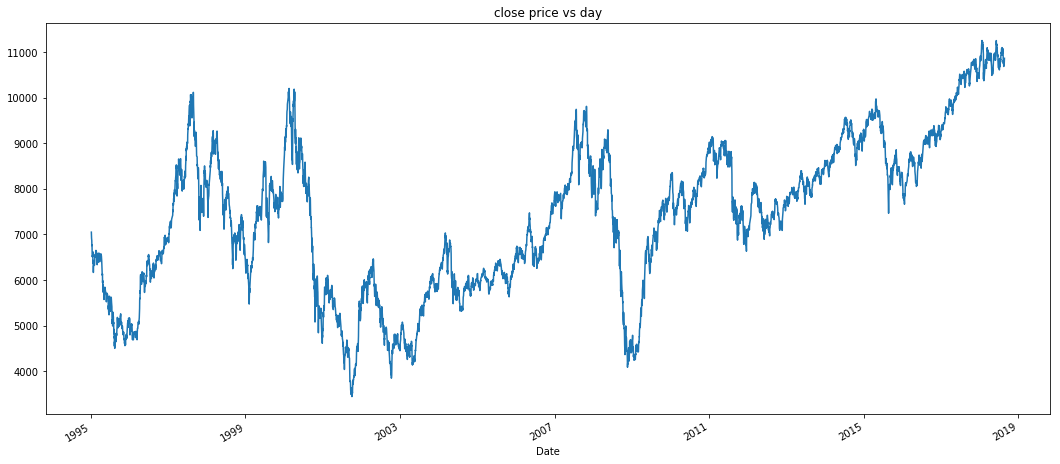

In [126]:
print(stock.head())
stock = stock.sort_index(ascending=True, axis=0)
stock.loc[:]['Close'].plot(figsize=(18, 8), title='close price vs day')
print(stock.head())

In [127]:
print(stock)

                Open      High       Low     Close        Volume
Date                                                            
1995-01-05   7129.94   7144.70   7040.72   7051.49           NaN
1995-01-06   7086.88   7086.88   6884.61   6919.31           NaN
1995-01-07   6948.27   6948.27   6855.55   6915.40           NaN
1995-01-09   6948.73   6959.74   6869.08   6869.08           NaN
1995-01-10   6817.85   6838.95   6706.67   6756.88           NaN
1995-01-11   6736.11   6791.05   6720.07   6777.24           NaN
1995-01-12   6749.62   6749.62   6571.93   6609.50           NaN
1995-01-13   6673.26   6685.93   6582.05   6582.40           NaN
1995-01-14   6565.52   6565.52   6450.79   6511.30           NaN
1995-01-16   6556.98   6556.98   6473.06   6536.65           NaN
1995-01-17   6564.25   6574.77   6487.73   6515.79           NaN
1995-01-18   6558.74   6638.41   6546.99   6623.52           NaN
1995-01-19   6635.62   6672.63   6598.02   6598.02           NaN
1995-01-20   6572.85   65

In [128]:
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb)])
        Y.append(data[(i+lb)])
    return np.array(X),np.array(Y)

In [129]:
window_size = 30
config_epochs = 80
config_lstm_size = 64

In [130]:
#print(stock['Close'])
#print(stock['Close'].values)
scl = MinMaxScaler()
#Scale the data
closes = stock['Close'].values
closes = closes.reshape(closes.shape[0],1)
closes = scl.fit_transform(closes)
print(closes)
X,y = processData(closes, window_size)

[[0.46180342]
 [0.44487213]
 [0.44437129]
 ...
 [0.94096082]
 [0.94249793]
 [0.95004643]]


In [131]:
print(len(stock))
print(len(X))

5922
5891


In [132]:
stock_split_index = len(X) - 40
print(stock_split_index)
X_train,X_test = X[:stock_split_index],X[stock_split_index:]
y_train,y_test = y[:stock_split_index],y[stock_split_index:]
print(len(X_train))
print(len(X_test))

5851
5851
40


In [133]:
model = Sequential()
model.add(LSTM(config_lstm_size,input_shape=(window_size,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=config_epochs,validation_data=(X_test,y_test),shuffle=False)

Train on 5851 samples, validate on 40 samples
Epoch 1/80
5851/5851 [==============================] - 5s 826us/step - loss: 0.0047 - val_loss: 2.3514e-04
Epoch 2/80
5851/5851 [==============================] - 3s 450us/step - loss: 0.0041 - val_loss: 1.7105e-04
Epoch 3/80
5851/5851 [==============================] - 3s 454us/step - loss: 0.0015 - val_loss: 1.7251e-04
Epoch 4/80
5851/5851 [==============================] - 3s 443us/step - loss: 6.4883e-04 - val_loss: 1.6540e-04
Epoch 5/80
5851/5851 [==============================] - 3s 444us/step - loss: 5.8713e-04 - val_loss: 1.6926e-04
Epoch 6/80
5851/5851 [==============================] - 3s 448us/step - loss: 6.8648e-04 - val_loss: 1.7140e-04
Epoch 7/80
5851/5851 [==============================] - 3s 444us/step - loss: 7.7820e-04 - val_loss: 1.6517e-04
Epoch 8/80
5851/5851 [==============================] - 3s 461us/step - loss: 8.0136e-04 - val_loss: 1.5535e-04
Epoch 9/80
5851/5851 [==============================] - 3s 450us/step 

5851/5851 [==============================] - 3s 460us/step - loss: 2.5609e-04 - val_loss: 1.2277e-04
Epoch 74/80
5851/5851 [==============================] - 3s 484us/step - loss: 2.5041e-04 - val_loss: 1.2112e-04
Epoch 75/80
5851/5851 [==============================] - 3s 471us/step - loss: 2.4831e-04 - val_loss: 1.2145e-04
Epoch 76/80
5851/5851 [==============================] - 3s 497us/step - loss: 2.5013e-04 - val_loss: 1.2022e-04
Epoch 77/80
5851/5851 [==============================] - 3s 482us/step - loss: 2.5108e-04 - val_loss: 1.1963e-04
Epoch 78/80
5851/5851 [==============================] - 3s 503us/step - loss: 2.4921e-04 - val_loss: 1.1813e-04
Epoch 79/80
5851/5851 [==============================] - 3s 497us/step - loss: 2.4749e-04 - val_loss: 1.1800e-04
Epoch 80/80
5851/5851 [==============================] - 3s 475us/step - loss: 2.3968e-04 - val_loss: 1.1654e-04


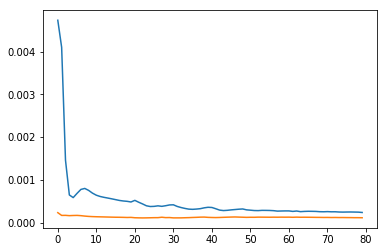

In [134]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

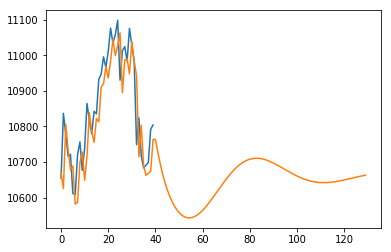

In [135]:
#Xt = model.predict(X_test)
#plt.plot(y_test.reshape(-1,1))
#plt.plot(Xt)
X_test_tmp = X_test.copy()
Xt = model.predict(X_test)
lastRow = X_test_tmp[39,:,0].reshape(-1)
#print(X_test_tmp.shape)
#print(Xt.shape)
#print(X_test_tmp)

for i in range(90):
    newVal = model.predict(lastRow.reshape(1,window_size,1))
    lastRow = np.append(lastRow, newVal[0,0])
    lastRow = np.delete(lastRow, 0)
    Xt = np.append(Xt, newVal[0,0])

plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt.reshape(-1, 1)))

In [136]:
model = Sequential()
model.add(LSTM(config_lstm_size, return_sequences=True, input_shape=(window_size,1)))
model.add(LSTM(config_lstm_size))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting
#history = model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),shuffle=False,callbacks=[plot])
history = model.fit(X_train,y_train,epochs=config_epochs,validation_data=(X_test,y_test),shuffle=False)

Train on 5851 samples, validate on 40 samples
Epoch 1/80
5851/5851 [==============================] - 8s 1ms/step - loss: 0.0072 - val_loss: 0.0016
Epoch 2/80
5851/5851 [==============================] - 6s 946us/step - loss: 0.0120 - val_loss: 0.0028
Epoch 3/80
5851/5851 [==============================] - 5s 930us/step - loss: 0.0052 - val_loss: 2.9914e-04
Epoch 4/80
5851/5851 [==============================] - 5s 916us/step - loss: 0.0013 - val_loss: 1.9737e-04
Epoch 5/80
5851/5851 [==============================] - 5s 905us/step - loss: 0.0011 - val_loss: 1.8480e-04
Epoch 6/80
5851/5851 [==============================] - 5s 902us/step - loss: 0.0012 - val_loss: 1.8527e-04
Epoch 7/80
5851/5851 [==============================] - 5s 906us/step - loss: 0.0013 - val_loss: 1.8583e-04
Epoch 8/80
5851/5851 [==============================] - 5s 925us/step - loss: 0.0013 - val_loss: 1.8381e-04
Epoch 9/80
5851/5851 [==============================] - 5s 914us/step - loss: 0.0013 - val_loss: 1.8

Epoch 74/80
5851/5851 [==============================] - 6s 987us/step - loss: 2.7409e-04 - val_loss: 1.3515e-04
Epoch 75/80
5851/5851 [==============================] - 6s 993us/step - loss: 2.6798e-04 - val_loss: 1.3178e-04
Epoch 76/80
5851/5851 [==============================] - 5s 929us/step - loss: 2.6474e-04 - val_loss: 1.3345e-04
Epoch 77/80
5851/5851 [==============================] - 5s 934us/step - loss: 2.6730e-04 - val_loss: 1.3067e-04
Epoch 78/80
5851/5851 [==============================] - 5s 900us/step - loss: 2.6116e-04 - val_loss: 1.3019e-04
Epoch 79/80
5851/5851 [==============================] - 5s 898us/step - loss: 2.6093e-04 - val_loss: 1.3022e-04
Epoch 80/80
5851/5851 [==============================] - 5s 897us/step - loss: 2.6164e-04 - val_loss: 1.3349e-04


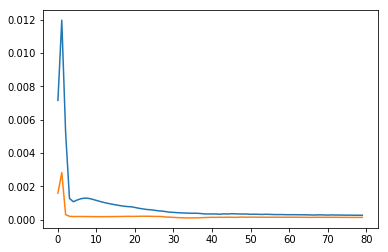

In [137]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

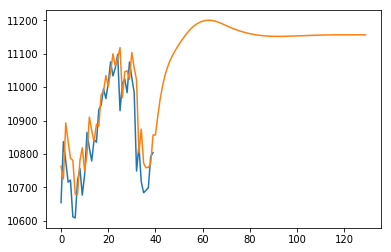

In [138]:
#Xt = model.predict(X_test)
#plt.plot(y_test.reshape(-1,1))
#plt.plot(Xt)
X_test_tmp = X_test.copy()
Xt = model.predict(X_test)
lastRow = X_test_tmp[39,:,0].reshape(-1)
#print(X_test_tmp.shape)
#print(Xt.shape)
#print(X_test_tmp)

for i in range(90):
    newVal = model.predict(lastRow.reshape(1,window_size,1))
    lastRow = np.append(lastRow, newVal[0,0])
    lastRow = np.delete(lastRow, 0)
    Xt = np.append(Xt, newVal[0,0])

plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt.reshape(-1, 1)))

In [140]:
model = Sequential()
model.add(LSTM(config_lstm_size, return_sequences=True, input_shape=(window_size,1)))
model.add(LSTM(config_lstm_size, return_sequences=True))
model.add(LSTM(config_lstm_size))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting
#history = model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),shuffle=False,callbacks=[plot])
history = model.fit(X_train,y_train,epochs=config_epochs,validation_data=(X_test,y_test),shuffle=False)

Train on 5851 samples, validate on 40 samples
Epoch 1/80
5851/5851 [==============================] - 11s 2ms/step - loss: 0.0060 - val_loss: 0.0010
Epoch 2/80
5851/5851 [==============================] - 7s 1ms/step - loss: 0.0202 - val_loss: 0.0137
Epoch 3/80
5851/5851 [==============================] - 8s 1ms/step - loss: 0.0153 - val_loss: 0.0034
Epoch 4/80
5851/5851 [==============================] - 8s 1ms/step - loss: 0.0018 - val_loss: 8.9566e-04
Epoch 5/80
5851/5851 [==============================] - 8s 1ms/step - loss: 0.0014 - val_loss: 4.4089e-04
Epoch 6/80
5851/5851 [==============================] - 8s 1ms/step - loss: 0.0014 - val_loss: 3.1220e-04
Epoch 7/80
5851/5851 [==============================] - 8s 1ms/step - loss: 0.0015 - val_loss: 2.6212e-04
Epoch 8/80
5851/5851 [==============================] - 8s 1ms/step - loss: 0.0015 - val_loss: 2.3651e-04
Epoch 9/80
5851/5851 [==============================] - 8s 1ms/step - loss: 0.0015 - val_loss: 2.2301e-04
Epoch 10/80

5851/5851 [==============================] - 8s 1ms/step - loss: 3.6704e-04 - val_loss: 1.0591e-04
Epoch 76/80
5851/5851 [==============================] - 8s 1ms/step - loss: 2.6617e-04 - val_loss: 1.8751e-04
Epoch 77/80
5851/5851 [==============================] - 8s 1ms/step - loss: 3.4783e-04 - val_loss: 1.1508e-04
Epoch 78/80
5851/5851 [==============================] - 8s 1ms/step - loss: 2.8102e-04 - val_loss: 1.5341e-04
Epoch 79/80
5851/5851 [==============================] - 8s 1ms/step - loss: 3.1193e-04 - val_loss: 1.2451e-04
Epoch 80/80
5851/5851 [==============================] - 8s 1ms/step - loss: 2.9842e-04 - val_loss: 1.2953e-04


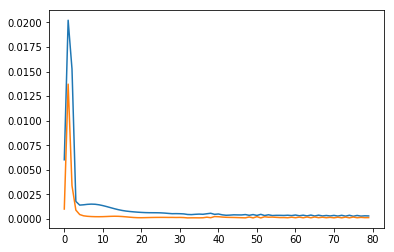

In [141]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

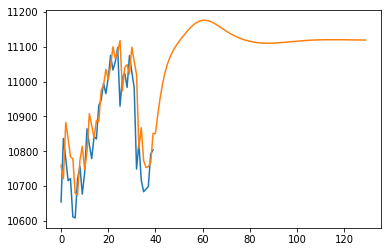

In [142]:
#Xt = model.predict(X_test)
#plt.plot(y_test.reshape(-1,1))
#plt.plot(Xt)
X_test_tmp = X_test.copy()
Xt = model.predict(X_test)
lastRow = X_test_tmp[39,:,0].reshape(-1)
#print(X_test_tmp.shape)
#print(Xt.shape)
#print(X_test_tmp)

for i in range(90):
    newVal = model.predict(lastRow.reshape(1,window_size,1))
    lastRow = np.append(lastRow, newVal[0,0])
    lastRow = np.delete(lastRow, 0)
    Xt = np.append(Xt, newVal[0,0])

plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt.reshape(-1, 1)))